In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

In [2]:
# young = np.loadtxt("/Users/bbrener1/battle/other_sc/young_counts.txt")
# old = np.loadtxt("/Users/bbrener1/battle/other_sc/old_counts.txt")
header = np.loadtxt("/Users/bbrener1/battle/other_sc/header.txt",dtype=str)
young = sc.read_text("/Users/bbrener1/battle/other_sc/young_counts.txt")
old = sc.read_text("/Users/bbrener1/battle/other_sc/old_counts.txt")

young.var_names = header
old.var_names = header

         Falling back to preprocessing with `sc.pp.pca` and default params.


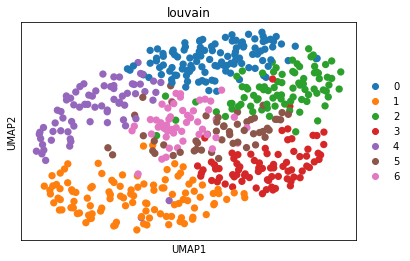

In [3]:
sc.pp.neighbors(young)
sc.tl.louvain(young)
sc.tl.umap(young)
sc.pl.umap(young,color='louvain')


In [4]:
print(young.shape)
print(old.shape)
print(header.shape)

(561, 4933)
(565, 4933)
(4933,)


In [5]:
import sys
# sys.path.append('/localscratch/bbrener1/rusty_forest_v3/src')
sys.path.append('../src')
import tree_reader as tr 
import lumberjack

In [ ]:
# forest = lumberjack.fit(
#     young.X,
#     header=header,
#     trees=300,
#     braids=3,
#     ifs=1500,
#     ofs=1500,
#     ss=1000,
#     depth=8,
#     leaves=10,
#     sfr=.5
# )

# forest.set_cache(True)

# forest.arguments

In [ ]:
# forest.backup("./scanpy_cmp_aging_blood")
# forest.tsne_coordinates = young.obsm['X_umap']

In [6]:
forest = tr.Forest.reconstitute('scanpy_cmp_aging_blood')
forest.arguments

['/Users/bbrener1/haxx/rusty_lumberjack_v3/target/release/rusty_lumberjack_v3',
 '-ic',
 '/var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmpkzbgpglt/input.counts',
 '-oc',
 '/var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmpkzbgpglt/output.counts',
 '-o',
 '/var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmpkzbgpglt/tmp',
 '-auto',
 '-ifh',
 '/var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmpkzbgpglt/tmp.ifh',
 '-ofh',
 '/var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmpkzbgpglt/tmp.ofh',
 '-trees',
 '300',
 '-braids',
 '3',
 '-ifs',
 '1500',
 '-ofs',
 '1500',
 '-ss',
 '500',
 '-depth',
 '8',
 '-leaves',
 '10',
 '-sfr',
 '0.5']

In [ ]:
forest.interpret_splits(mode='additive_mean',k=20,relatives=True,pca=100,metric='cosine')

In [ ]:
forest.maximum_spanning_tree(mode='samples')

In [ ]:
forest.html_tree_summary(n=10)

In [15]:
young_prediction = forest.predict(young.X)
old_prediction = forest.predict(old.X)

Predicting tree:297
0.6759073921798286


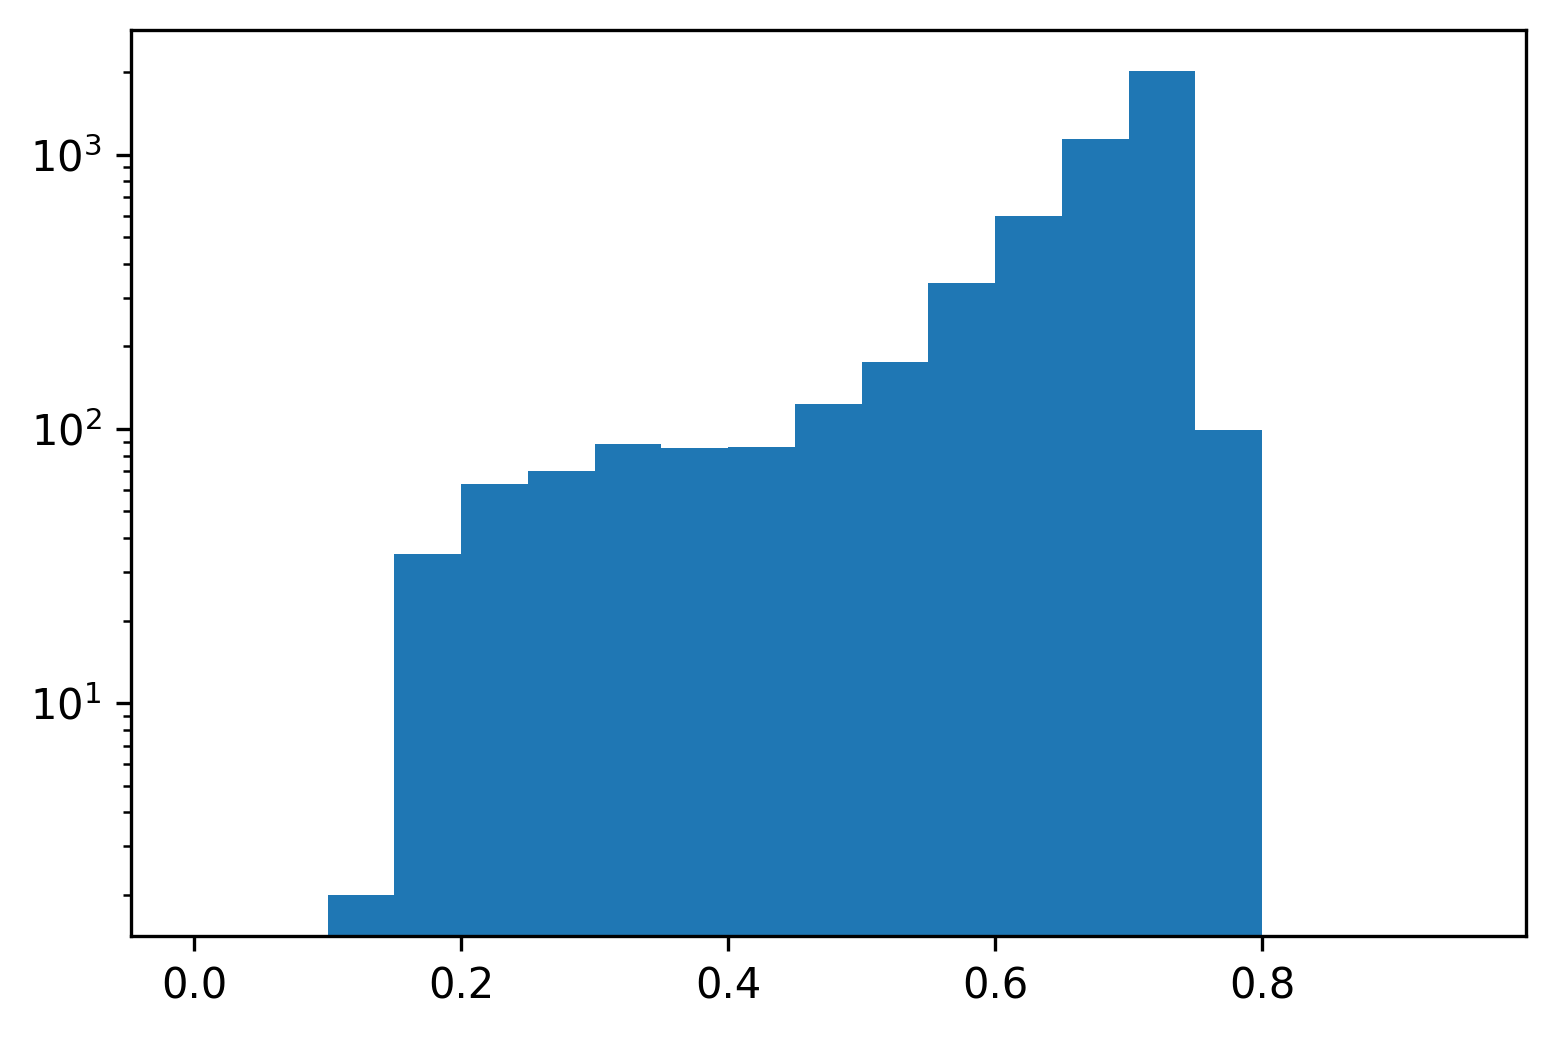

(array(['Olfr1307', 'Vmn1r81', 'Gm37086', 'Olfr635', 'AC117226.1',
       'Gm10123', 'Gm44715', 'AC126673.3', 'AC153887.2', 'Gm42519'],
      dtype='<U14'), array([0.13308879, 0.13798566, 0.16025827, 0.16044777, 0.16222706,
       0.16383003, 0.16746357, 0.16781526, 0.16849536, 0.1686306 ]))
(array(['Plscr2', 'Cd24a', 'Ggnbp2', 'Spin1', 'Gm24081', 'Mien1',
       'A430103D13Rik', 'Zfp991', 'Pstpip1', 'Gm22601'], dtype='<U14'), array([0.75892603, 0.760096  , 0.76109814, 0.76128274, 0.76133117,
       0.76142994, 0.76162438, 0.76254826, 0.76296744, 0.76342751]))
[275 138 133 357 180 421 479 454 118 173] [0.43439869 0.43663096 0.45023515 0.4511529  0.45330035 0.47262081
 0.47794562 0.47838972 0.48227136 0.48301771]
[433 331 430 250  48 144 265  73  98 336] [0.80841726 0.80971655 0.81331787 0.81794757 0.81881887 0.82121011
 0.82564945 0.82606304 0.83310617 0.83423513]


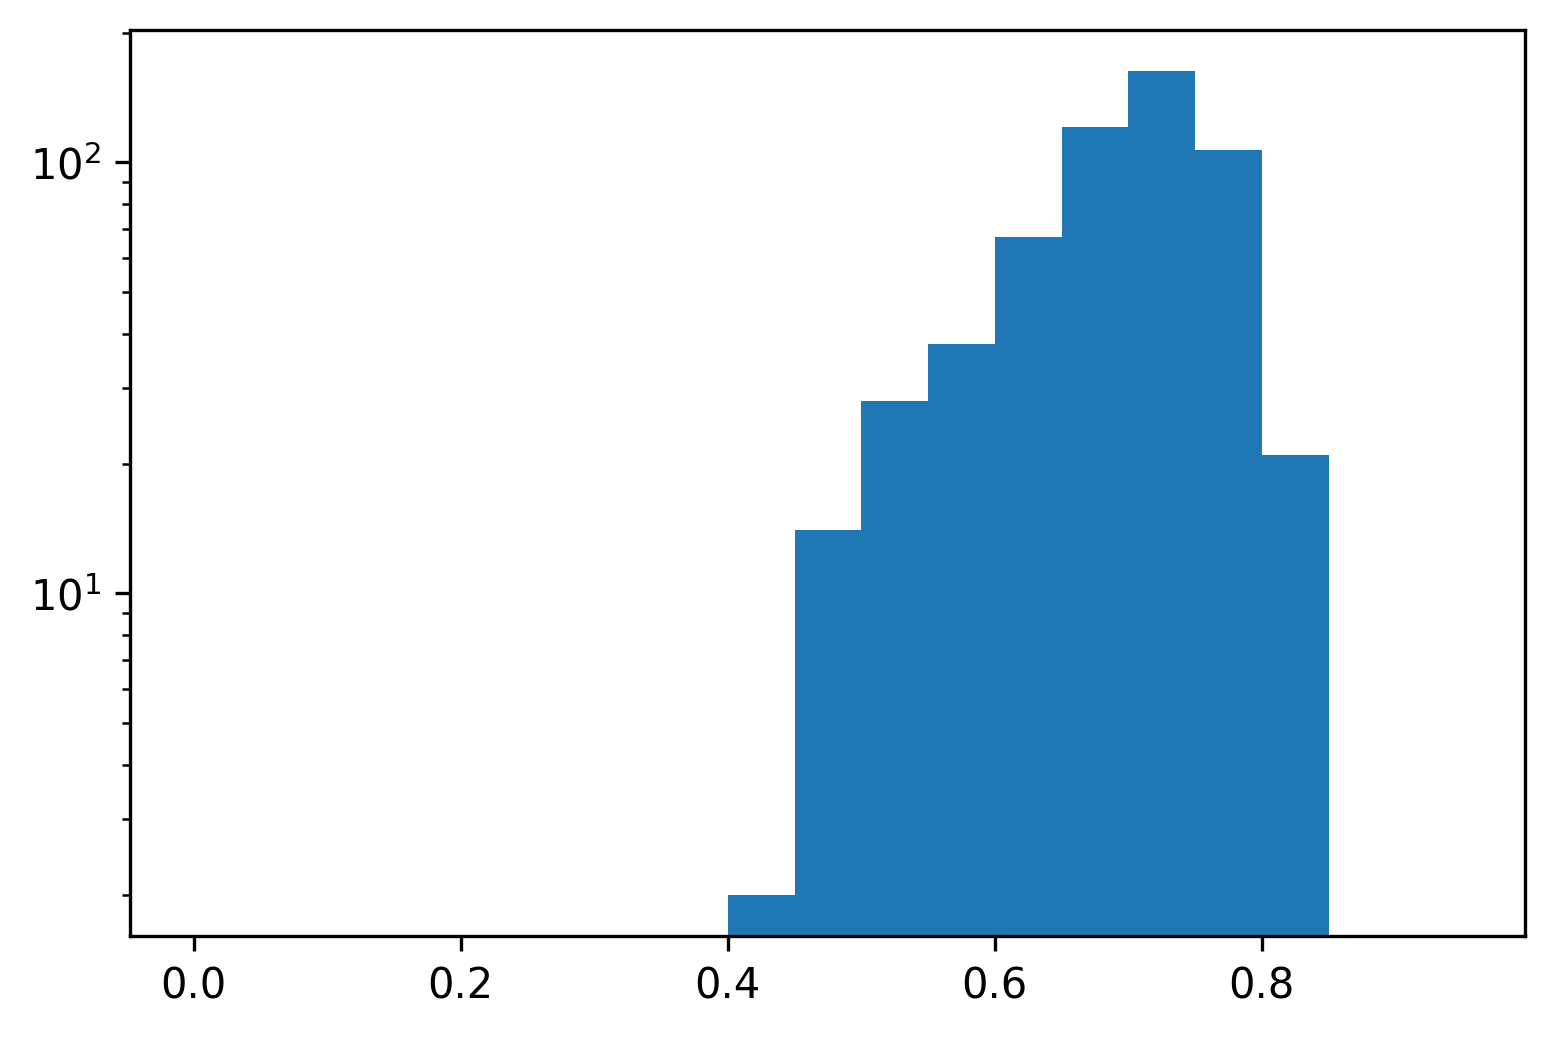

Predicting tree:297
0.9693166349710356


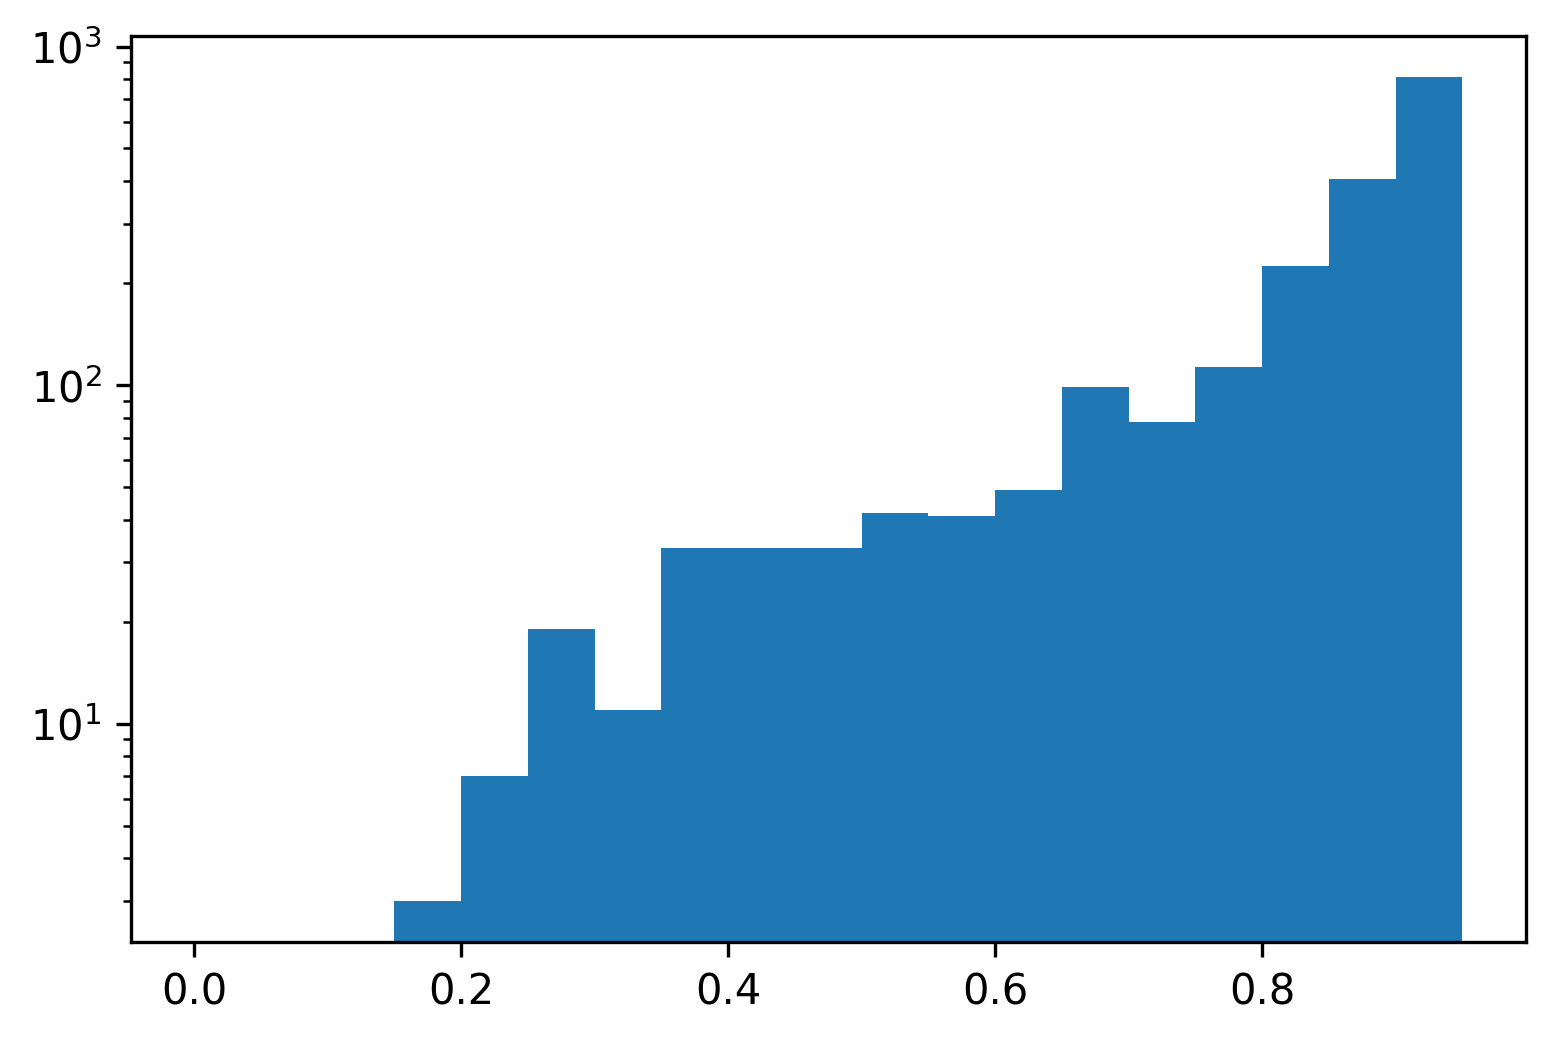

(array(['Olfr1307', 'Olfr635', 'CT010444.1', 'AC126673.3', 'AC152979.2',
       'Gm42519', 'Ppia', 'Vmn1r81', 'AC104897.1', 'Gm43960'],
      dtype='<U14'), array([0.19125319, 0.192571  , 0.19821004, 0.21362924, 0.22646318,
       0.23222595, 0.24073737, 0.24089658, 0.24467461, 0.24824279]))
(array(['Erdr1', 'mt-Rnr1', 'mt-Rnr2', 'Gm28438', 'AC158592.1', 'Hba-a2',
       'Gm27404', 'Hba-a1', 'CT010467.1', 'AY036118'], dtype='<U14'), array([  4.68158747,   4.73959173,   5.42633273,   5.93048225,
         5.98393165,   6.60449924,   7.43181123,   7.79625342,
        10.48392971, 156.7418235 ]))
[227 242 274 548 246  92 337 239 341 448] [0.57562831 0.59330328 0.63484375 0.66392387 0.66487917 0.68344106
 0.68828935 0.70378492 0.70750901 0.70905433]
[378 330  70 104 105 324 415  16 270 506] [1.04343399 1.04474598 1.04602174 1.04698595 1.04736447 1.04763449
 1.04836968 1.04943753 1.05024009 1.0554847 ]


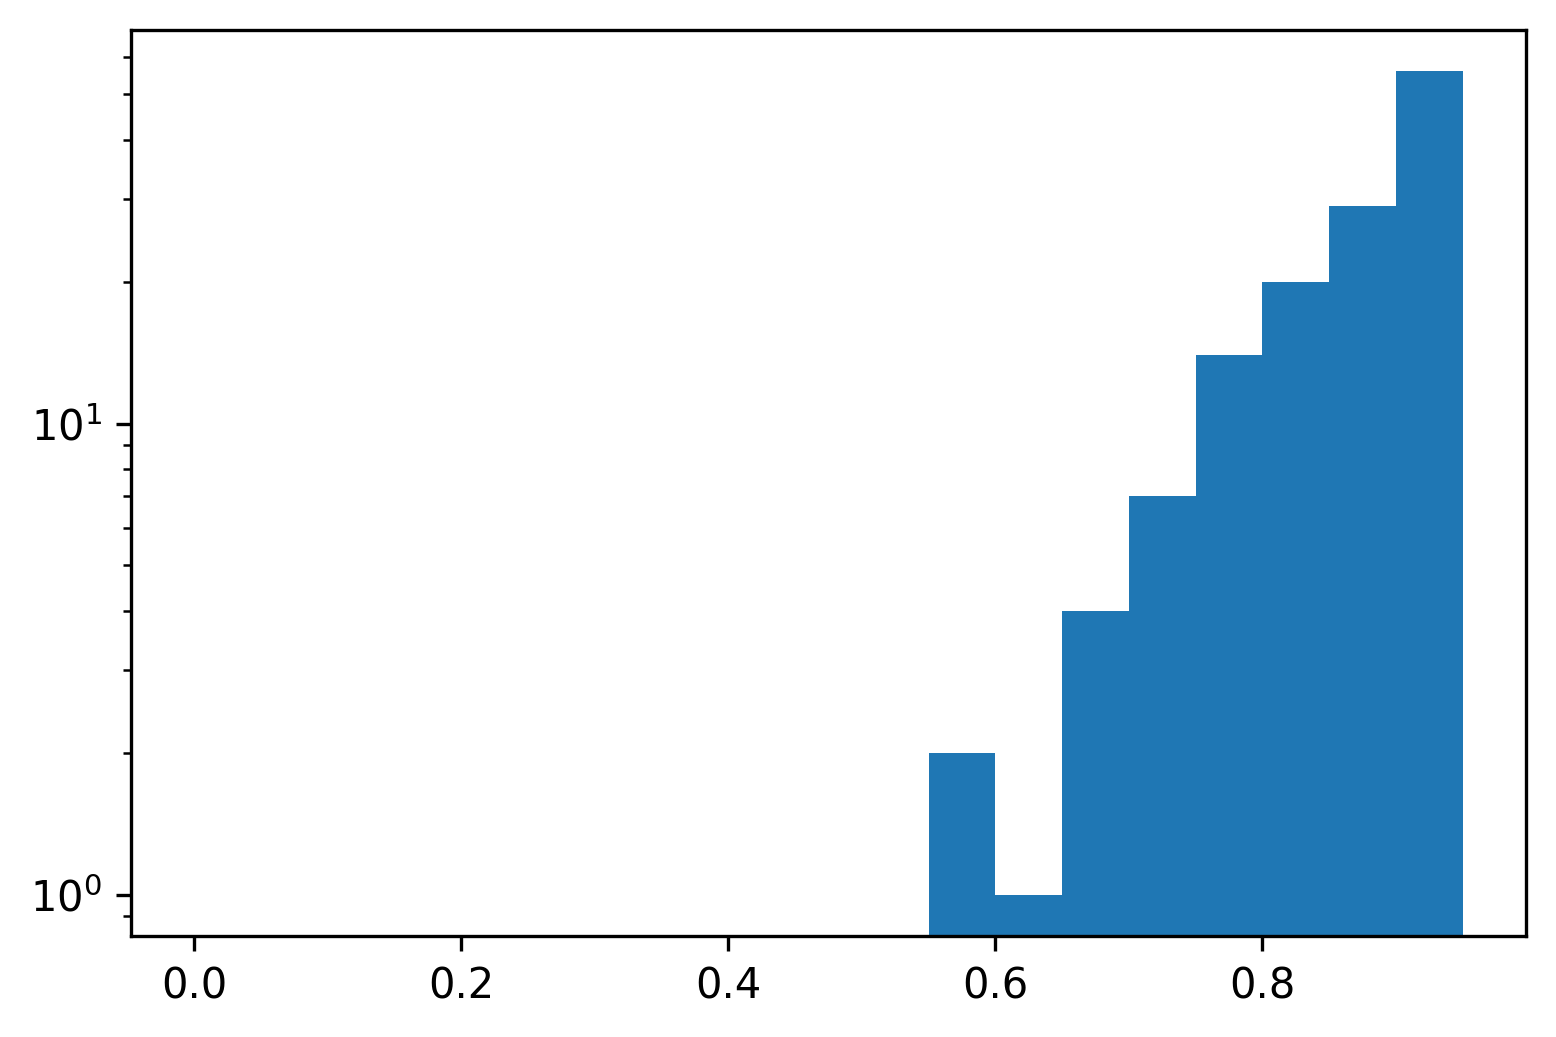

In [16]:
young_features, young_samples = young_prediction.prediction_report(mode="additive_mean")
old_features, old_samples = old_prediction.prediction_report(mode="additive_mean")

In [10]:
delta,match = young_prediction.compare_predictions(old_prediction)

(array(['Gm24026', 'Gm22008', 'Uqcrh', 'Gm44922', 'Arl6ip1', 'Psmb1',
       'Gm44377', 'Anxa5', 'Ifitm1', 'Tlr1'], dtype='<U14'), array([-1.17250298, -0.96871264, -0.80174243, -0.72062742, -0.69383895,
       -0.67945411, -0.66916949, -0.65516636, -0.63633701, -0.6128619 ]))
(array(['AC147565.1', 'Gm17604', 'Gm24303', 'Gm24586', 'Hba-a1', 'Hbb-bs',
       'Gm25197', 'Gm25190', 'Gm28017', 'Hba-a2'], dtype='<U14'), array([2.23690769, 2.26271416, 2.35931174, 2.53554707, 3.02559228,
       3.82505815, 4.76170393, 4.95169955, 5.12331497, 5.56187663]))


In [13]:
delta_sort = np.argsort(np.abs(delta))
delta[delta_sort]

array([-1.44813224e-04,  4.90836910e-04,  7.75910385e-04, ...,
       -1.41223526e+01, -2.06084235e+01, -3.60486807e+01])

In [ ]:
old_prediction.feature_mse()

In [ ]:
feature_mask = np.random.random(young.X.shape[1]) > .5
in_counts,out_counts = young.X.T[feature_mask].T,young.X.T[~feature_mask].T

In [ ]:
from sklearn.decomposition import PCA

model = PCA(n_components=30).fit(out_counts)
transformed = model.transform(out_counts)
recovered = model.inverse_transform(transformed)

centered = out_counts - np.mean(out_counts,axis=0)
transformed_residual = np.power(centered,2)

recovered_residual = np.power(out_counts - recovered,2)

pca_recovered_per_sample = np.sum(recovered_residual,axis=1)
pca_recovered_fraction_per_sample = np.sum(recovered_residual,axis=1) / np.sum(transformed_residual,axis=1)
print(np.sum(transformed_residual))
print(np.sum(recovered_residual))

print(f"Remaining variance:{(np.sum(recovered_residual) / np.sum(transformed_residual))}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RF

forest_model = RF(n_estimators=100,min_samples_split=10,verbose=4,n_jobs=10,max_samples=200).fit(in_counts,out_counts)


In [ ]:
recovered = forest_model.predict(in_counts)

recovered_residual = np.power(out_counts - recovered,2)

print(f"Remaining variance:{(np.sum(recovered_residual) / np.sum(transformed_residual))}")

In [ ]:
plt.figure()
plt.scatter(*young.obsm['X_umap'].T,c=young_samples)
plt.colorbar()

In [ ]:
dir(young_prediction)